In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("ticks")

In [2]:
sampledemog_raw_data = pd.read_csv('../smcpp_pyrho/plots/autosome_Gog_Woredaplot.csv')
sampledemog_data = pd.DataFrame(dict(years=sampledemog_raw_data.x,
                               Ne=sampledemog_raw_data.y,
                               population=sampledemog_raw_data.label
                              ))
sampledemog_data['years'] = sampledemog_data.years.round(0).astype(int)
sampledemog_data['Ne'] = sampledemog_data.Ne.round(0).astype(int)
sampledemog_data.head()

,years,Ne,population
0,0,56381,Gog_Woreda
1,110,56381,Gog_Woreda
2,126,56381,Gog_Woreda
3,145,56381,Gog_Woreda
4,167,56381,Gog_Woreda


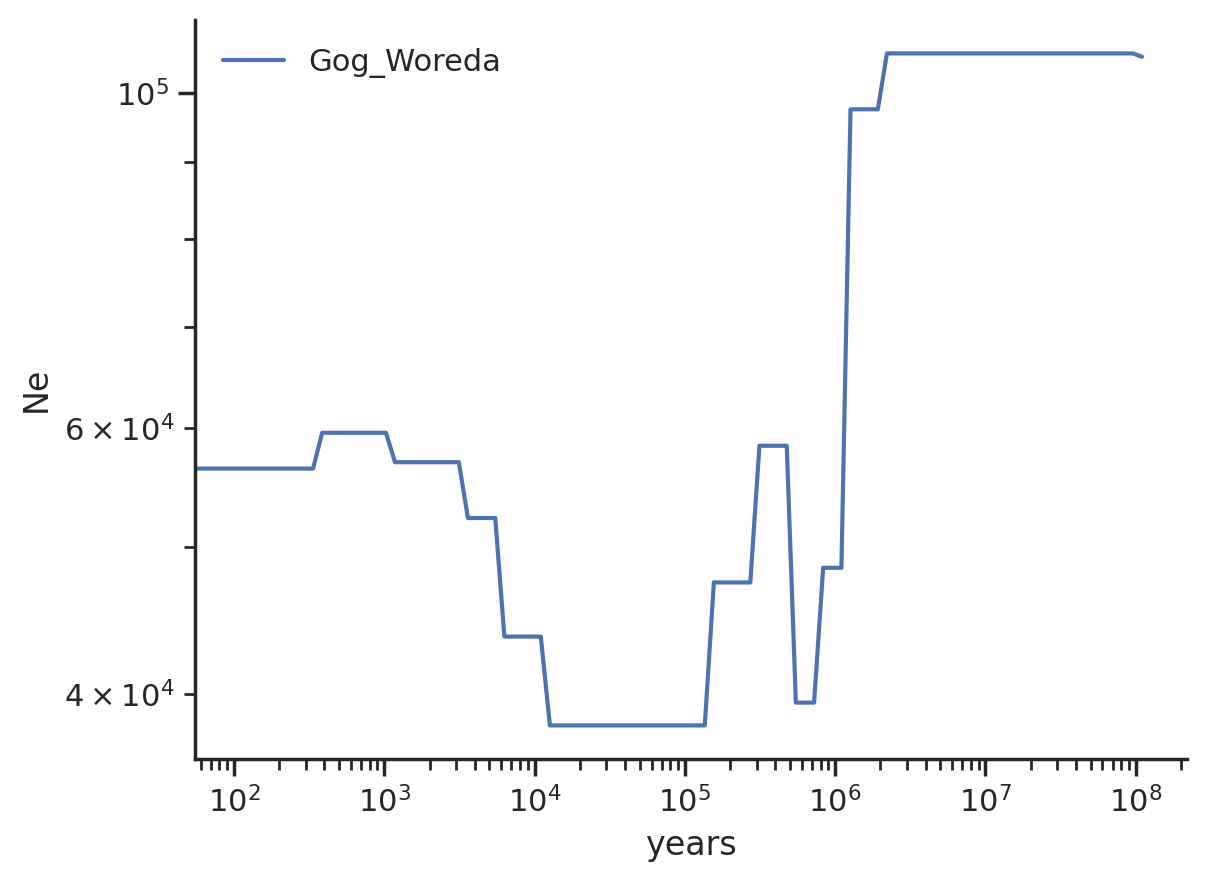

In [3]:
with sns.axes_style('ticks') :
    fig, ax = plt.subplots()
    sns.lineplot(data=sampledemog_data, x='years', y='Ne', hue='population', ax=ax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], frameon=False)
    sns.despine()

In [4]:
gen_time = 11
years = sampledemog_data.years
gens = years / gen_time
Ne = sampledemog_data.Ne 
assert len(gens) == len(Ne)

demography = list(zip(gens, Ne))
demography[:10]

[(0.0, 56381),
 (10.0, 56381),
 (11.454545454545455, 56381),
 (13.181818181818182, 56381),
 (15.181818181818182, 56381),
 (17.454545454545453, 56381),
 (20.09090909090909, 56381),
 (23.09090909090909, 56381),
 (26.545454545454547, 56381),
 (30.545454545454547, 56381)]

In [6]:
def exp_coal(g, N):
    """
    Compute expected coalescence time in epoch
    N is the number of diploid invididuals
    g is the number of generations spanned by the epoch
    """
    return 2*N - (g * np.exp(-g/(2*N))) / (1 - np.exp(-g/(2*N)))

def epoch(demog, h, i):
    "Recursively compute expected coalescence time across all epoches"
    g, N = demog[i]
    N *= h
    if i == len(demog)-1:
        return 2*N
    return (1-np.exp(-g/(2*N))) * exp_coal(g, N) + np.exp(-g/(2*N)) * (g + epoch(demog, h, i+1))

def pool_nielsen(gens, Ne, h):
    """
    Compute expected coalescence time in units of 2N
    Ne is the a list/series of Ne in the epoque.
    gens is the a list/series of generation at which an each epoque begins (the last epoque lasts forever)
    h is the relative population size, 0.75 for chrX.
    """
    epoques = list()
    for i in range(len(gens)):
        if i == 0:
            epoques.append((gens[i+1], Ne[i]))
        elif i == len(gens)-1:
            epoques.append((None, Ne[i]))    
        else:
            epoques.append((gens[i+1] - gens[i], Ne[i]))
    return epoch(epoques, h, 0)

gen_time = 30
gens = sampledemog_data.years / gen_time
Ne = sampledemog_data.Ne

pool_nielsen(gens, Ne, 0.75) / pool_nielsen(gens, Ne, 1)

0.7002446358658926